In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Read and preprocess
img = cv2.imread("sample.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [25]:
# Add synthetic blobs
output = gray.copy()
h, w = gray.shape
for _ in range(10):
    x, y = np.random.randint(20, w-20), np.random.randint(20, h-20)
    cv2.circle(output, (x, y), 10, 255, -1)

In [26]:
# Threshold
_, thresh = cv2.threshold(output, 128, 255, cv2.THRESH_BINARY)

In [27]:
# Find connected components with stats
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(thresh)

In [28]:
# Filter out small regions (noise)
min_area = 100  # only keep blobs larger than this
blob_count = np.sum(stats[1:, cv2.CC_STAT_AREA] > min_area)

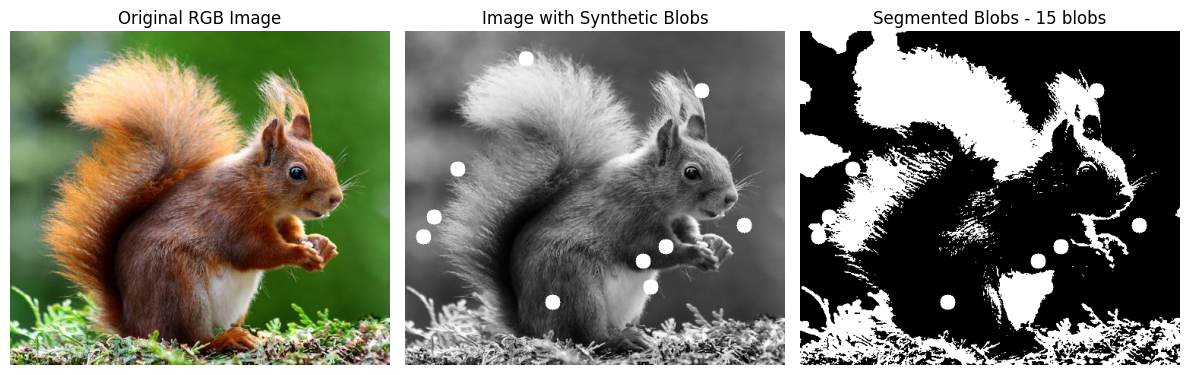

In [29]:
# Display
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Original RGB Image"), plt.axis("off")
plt.subplot(1, 3, 2), plt.imshow(output, cmap="gray"), plt.title("Image with Synthetic Blobs"), plt.axis("off")
plt.subplot(1, 3, 3), plt.imshow(thresh, cmap="gray"), plt.title(f"Segmented Blobs - {blob_count} blobs"), plt.axis("off")
plt.tight_layout()
plt.show()